## Recommendation of Opening a new shop in Hong Kong for ABC Outdoor Supply Store 

import suitable library for data collection,data preparation

In [2]:
import requests # library to handle requests
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Search data from internest and store data into data frame

In [7]:
url = 'https://en.wikipedia.org/wiki/Districts_of_Hong_Kong'

# Getting the webpage, creating a Response object.
response = requests.get(url)
 
# Extracting the source code of the page.
data = response.text
 
# Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
soup = BeautifulSoup(data, 'lxml')

#After retreiving the URL and creating a Beautiful soup object** 

#Firstly create a list**  

#Later after finding the table and table data  create a dictionary

#Append to the list  

#Create a dataframe with list

    
table = soup.find('table', {'class': 'wikitable sortable'})

trs = table.find_all('tr')[1:]
table_contents = list()
for tr in trs:
    table_contents.append([td.text.replace('\n', '').replace('\xa0', '') for td in tr.find_all('td')])

df=pd.DataFrame(table_contents,columns=["District","Chinese","Population of 2016","Population Growth from 2006","Density"])
df

,District,Chinese,Population of 2016,Population Growth from 2006,Density
0,Central and Western,中西區,"243,266",-2.7%,"19,391"
1,Eastern,東區,"555,034",-2.8%,"30,861"
2,Southern,南區,"274,994",-0.6%,"7,080"
3,Wan Chai,灣仔區,"180,123",-0.1%,"17,137"
4,"1,253,417",-1.2%,"15,691",None,None
5,Sham Shui Po,深水埗區,"405,869",+11.0%,"43,381"
6,Kowloon City,九龍城區,"418,732",+15.5%,"41,802"
7,Kwun Tong,觀塘區,"648,541",+10.4%,"57,530"
8,Wong Tai Sin,黃大仙區,"425,235",+0.4%,"45,711"
9,Yau Tsim Mong,油尖旺區,"342,970",+22.3%,"49,046"


In [8]:
#drop the row no need
df.drop([4, 10,20,21],inplace=True)

HongKong_data = df.reset_index(drop=True)

HongKong_data 

,District,Chinese,Population of 2016,Population Growth from 2006,Density
0,Central and Western,中西區,"243,266",-2.7%,"19,391"
1,Eastern,東區,"555,034",-2.8%,"30,861"
2,Southern,南區,"274,994",-0.6%,"7,080"
3,Wan Chai,灣仔區,"180,123",-0.1%,"17,137"
4,Sham Shui Po,深水埗區,"405,869",+11.0%,"43,381"
5,Kowloon City,九龍城區,"418,732",+15.5%,"41,802"
6,Kwun Tong,觀塘區,"648,541",+10.4%,"57,530"
7,Wong Tai Sin,黃大仙區,"425,235",+0.4%,"45,711"
8,Yau Tsim Mong,油尖旺區,"342,970",+22.3%,"49,046"
9,Islands,離島區,"156,801",+14.4%,886


In [9]:
HongKong_data.shape

(18, 5)

Get the geographical coordinates for each districs 

In [10]:
!pip install geocoder
import geocoder # import geocoder

#create a function with a simple while loop until get the coordinates
#create new dataframe columns to save the latitude and longtitude 

from geopy.geocoders import Nominatim

# define a function to get coordinates
def get_latlng(district):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hong Kong'.format(district))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(district) for district in HongKong_data["District"].tolist() ]


# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_latlngcoords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
HongKong_data['Latitude'] = df_latlngcoords['Latitude']
HongKong_data['Longitude'] = df_latlngcoords['Longitude']

HongKong_data.head(5)

,District,Chinese,Population of 2016,Population Growth from 2006,Density,Latitude,Longitude
0,Central and Western,中西區,"243,266",-2.7%,"19,391",22.282190,114.144860
1,Eastern,東區,"555,034",-2.8%,"30,861",22.272090,114.221396
2,Southern,南區,"274,994",-0.6%,"7,080",22.258010,114.153080
3,Wan Chai,灣仔區,"180,123",-0.1%,"17,137",22.277101,114.173837
4,Sham Shui Po,深水埗區,"405,869",+11.0%,"43,381",22.329351,114.159179


Create a map to have visualization of current districs in Hong Kong

In [26]:
# create a new dataframe as HongKong_data.

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# get the geographical coordinates of Hong Kong
# visualizat Hong Kong for 18 districts in it

address = 'Hong Kong'

geolocator = Nominatim(user_agent="HK_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131.


In [27]:
# create map of Hong Kong using latitude and longitude values
map_HongKong = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(HongKong_data['Latitude'], HongKong_data['Longitude'], HongKong_data['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HongKong)  
    
map_HongKong


##Because Github could not show the foliummap, so base on teaching assistant advice, show a image as the screen capture here below 
#pls click the picture url here,thanks a lot!:
url:https://github.com/jessicaluo20/Coursera_Capstone/blob/79bbebcf2d75ca7c39e6c757b936a6ecf3ae2aa3/HongKongDistricts.jpg 

Use the Foursquare API to explore all districs

In [32]:
# Here I use myself Foursquare ID ,Foursquare Secret,FourSquare Access Token to run the code and got the result as below
# While since my personal information is not plan to disclosed, pls kindly insert your Foursquare ID ,Foursquare Secret,FourSquare Access Token below to run the code again if you want
CLIENT_ID = ' ' # pls insert your Foursquare ID
CLIENT_SECRET = ' ' # pls insert your Foursquare Secret
ACCESS_TOKEN = ' ' # pls insert your FourSquare Access Token 

In [12]:
# start utilizing the Foursquare API to explore the neighborhoods and segment them but need to hide personal data!
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#Explore 18 districs in Hong Kong for radius within 2km

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
                

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)





In [13]:
# run the above function on each distric and create a new dataframe 

HongKong_venues =getNearbyVenues(HongKong_data['District'], HongKong_data['Latitude'], HongKong_data['Longitude'], radius=2000)
# Let's check how many venues were returned for each district
HongKong_venues.groupby('District').head(5)

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central and Western,22.282190,114.144860,"Morning Trail, The Peak (山頂晨運徑)",22.278008,114.144432,Trail
1,Central and Western,22.282190,114.144860,Frantzén's Kitchen by Björn Frantzén,22.284808,114.148220,Scandinavian Restaurant
2,Central and Western,22.282190,114.144860,Okra Hong Kong,22.286108,114.146104,Japanese Restaurant
3,Central and Western,22.282190,114.144860,Craftissimo,22.284589,114.148293,Beer Store
4,Central and Western,22.282190,114.144860,Brut!,22.286156,114.143600,Tapas Restaurant
100,Eastern,22.272090,114.221396,Master Low-key Food Shop (低調高手大街小食),22.279212,114.229606,Snack Place
101,Eastern,22.272090,114.221396,Quarry Gap (大風坳),22.266827,114.213317,Other Great Outdoors
102,Eastern,22.272090,114.221396,Ashoka Indian Restaurant (皇子印度餐廳),22.280257,114.224753,Indian Restaurant
103,Eastern,22.272090,114.221396,On Lee Noodle Shop (安利魚蛋粉麵),22.280288,114.230445,Noodle House
104,Eastern,22.272090,114.221396,Mount Butler (畢拿山),22.267666,114.211128,Mountain


In [14]:
# check if the results contain "Outdoor Supply Store"
"Outdoor Supply Store" in HongKong_venues['Venue Category'].unique()

True

Analyze Each District

In [15]:
#Analyze Each District
# one hot encoding
HongKong_onehot = pd.get_dummies(HongKong_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
HongKong_onehot['District'] = HongKong_venues['District'] 

# move disctrict column to the first column
fixed_columns = [HongKong_onehot.columns[-1]] + list(HongKong_onehot.columns[:-1])
HongKong_onehot = HongKong_onehot[fixed_columns]

HongKong_onehot.head()

# group rows by district and by taking the mean of the frequency of occurrence of each category

HongKong_grouped = HongKong_onehot.groupby('District').mean().reset_index()
HongKong_grouped

,District,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Fujian Restaurant,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Mountain,Multiplex,Museum,Music Store,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Other Great Outdoors,Outdoor Supply Store,Outlet Store,Pakistani Restaurant,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Playground,Plaza,Pool,Racecourse,Ramen Restaurant,Record Shop,Reservoir,Residential Building (Apartment / Condo),Restaurant,Sake Bar,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.01,0.010000,0.00,0.00,0.0000,0.010000,0.010000,0.020000,0.000000,0.02,0.00,0.02,0.00,0.00,0.000000,0.000000,0.010000,0.01,0.00,0.00,0.00,0.0000,0.000000,0.000000,0.00,0.040000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.030000,0.000000,0.00,0.000000,0.00,0.060000,0.030000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.010000,0.0000,0.020000,0.000000,0.00,0.010000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.010000,0.05,0.000000,0.000000,0.000000,0.02,0.000000,0.00,0.00,0.000000,0.0000,0.01,0.00,0.010000,0.010000,0.020000,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.00,0.020000,0.00,0.030000,0.000000,0.00,0.00,0.00,0.00,0.020000,0.0100,0.040000,0.00,0.070000,0.000000,0.00,0.01,0.00,0.00,0.00,0.01,0.000000,0.00,0.00,0.010000,0.010000,0.00,0.01,0.010000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.01,0.00,0.010000,0.00,0.00,0.00,0.00,0

In [16]:
#Create a new DataFrame for Outdoor Supply Store data only
HK_outdoorshop = HongKong_grouped[["District","Outdoor Supply Store"]]
HK_outdoorshop.head(10)

,District,Outdoor Supply Store
0,Central and Western,0.00
1,Eastern,0.00
2,Islands,0.00
3,Kowloon City,0.00
4,Kwai Tsing,0.00
5,Kwun Tong,0.00
6,North,0.00
7,Sai Kung,0.00
8,Sha Tin,0.00
9,Sham Shui Po,0.01


In [18]:
#Merge dataframe with the population data in each districs
HK_outdoorshopwithpopulation=pd.merge(HK_outdoorshop,HongKong_data,how="left",on='District')
HK_outdoorshopwithpopulation.rename(columns={"Population of 2016": "Population", "Population Growth from 2006": "Population Growth"},inplace=True)
HK_outdoorshopwithpopulation

,District,Outdoor Supply Store,Chinese,Population,Population Growth,Density,Latitude,Longitude
0,Central and Western,0.00,中西區,"243,266",-2.7%,"19,391",22.282190,114.144860
1,Eastern,0.00,東區,"555,034",-2.8%,"30,861",22.272090,114.221396
2,Islands,0.00,離島區,"156,801",+14.4%,886,22.314680,113.932430
3,Kowloon City,0.00,九龍城區,"418,732",+15.5%,"41,802",22.311130,114.183540
4,Kwai Tsing,0.00,葵青區,"520,572",-0.5%,"22,307",22.314236,114.226625
5,Kwun Tong,0.00,觀塘區,"648,541",+10.4%,"57,530",22.314236,114.226625
6,North,0.00,北區,"315,270",+12.3%,"2,310",22.513688,114.206956
7,Sai Kung,0.00,西貢區,"461,864",+13.6%,"3,563",22.400012,114.313797
8,Sha Tin,0.00,沙田區,"659,794",+8.6%,"9,602",22.382036,114.202102
9,Sham Shui Po,0.01,深水埗區,"405,869",+11.0%,"43,381",22.329351,114.159179


In [19]:
HK_outdoorshopwithpopulation['Population'] = HK_outdoorshopwithpopulation['Population'].str.replace(',','').astype(float)
HK_outdoorshopwithpopulation

,District,Outdoor Supply Store,Chinese,Population,Population Growth,Density,Latitude,Longitude
0,Central and Western,0.00,中西區,243266.0,-2.7%,"19,391",22.282190,114.144860
1,Eastern,0.00,東區,555034.0,-2.8%,"30,861",22.272090,114.221396
2,Islands,0.00,離島區,156801.0,+14.4%,886,22.314680,113.932430
3,Kowloon City,0.00,九龍城區,418732.0,+15.5%,"41,802",22.311130,114.183540
4,Kwai Tsing,0.00,葵青區,520572.0,-0.5%,"22,307",22.314236,114.226625
5,Kwun Tong,0.00,觀塘區,648541.0,+10.4%,"57,530",22.314236,114.226625
6,North,0.00,北區,315270.0,+12.3%,"2,310",22.513688,114.206956
7,Sai Kung,0.00,西貢區,461864.0,+13.6%,"3,563",22.400012,114.313797
8,Sha Tin,0.00,沙田區,659794.0,+8.6%,"9,602",22.382036,114.202102
9,Sham Shui Po,0.01,深水埗區,405869.0,+11.0%,"43,381",22.329351,114.159179


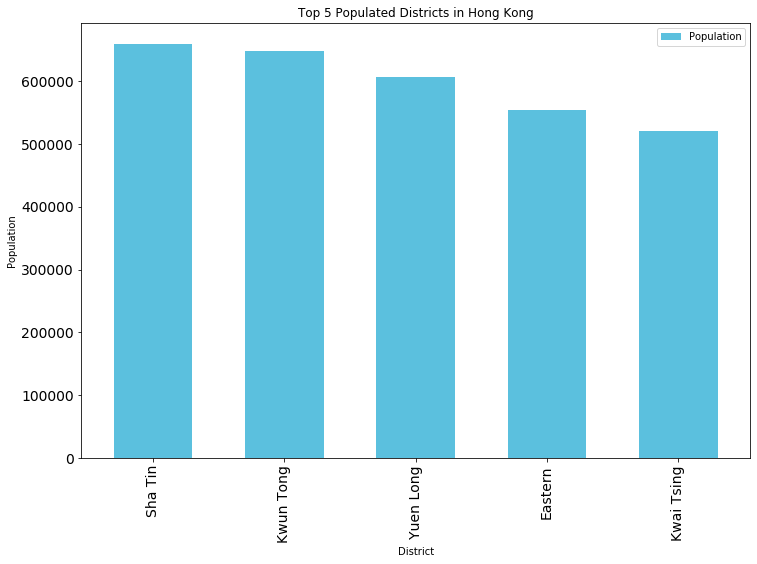

In [20]:
#Visualize to find top 5 population district
import matplotlib.pyplot as plt

population_chart = HK_outdoorshopwithpopulation[['District', 'Population']].copy()
top_chart = population_chart.sort_values('Population', ascending=False).head(5)
top_chart.set_index('District', inplace=True)

# plot data
colortoshow = ['#5bc0de', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colortoshow)

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Top 5 Populated Districts in Hong Kong') # add title to the plot

plt.show()

Cluster Districs using K-Clustering

In [22]:
#Select suitable features for clustering
HK_clustering = HK_outdoorshopwithpopulation.drop(["District","Chinese","Density","Latitude","Longitude","Population Growth"],axis=1)

HK_clustering     
                                               

,Outdoor Supply Store,Population
0,0.00,243266.0
1,0.00,555034.0
2,0.00,156801.0
3,0.00,418732.0
4,0.00,520572.0
5,0.00,648541.0
6,0.00,315270.0
7,0.00,461864.0
8,0.00,659794.0
9,0.01,405869.0


In [23]:
#Run k-means to cluster the districs into 3 clusters

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# create a new dataframe that includes the cluster 
HK_merged = HK_outdoorshopwithpopulation.copy()

# add clustering labels
HK_merged["Cluster Labels"] = kmeans.labels_

HK_merged

,District,Outdoor Supply Store,Chinese,Population,Population Growth,Density,Latitude,Longitude,Cluster Labels
0,Central and Western,0.00,中西區,243266.0,-2.7%,"19,391",22.282190,114.144860,0
1,Eastern,0.00,東區,555034.0,-2.8%,"30,861",22.272090,114.221396,1
2,Islands,0.00,離島區,156801.0,+14.4%,886,22.314680,113.932430,0
3,Kowloon City,0.00,九龍城區,418732.0,+15.5%,"41,802",22.311130,114.183540,2
4,Kwai Tsing,0.00,葵青區,520572.0,-0.5%,"22,307",22.314236,114.226625,2
5,Kwun Tong,0.00,觀塘區,648541.0,+10.4%,"57,530",22.314236,114.226625,1
6,North,0.00,北區,315270.0,+12.3%,"2,310",22.513688,114.206956,0
7,Sai Kung,0.00,西貢區,461864.0,+13.6%,"3,563",22.400012,114.313797,2
8,Sha Tin,0.00,沙田區,659794.0,+8.6%,"9,602",22.382036,114.202102,1
9,Sham Shui Po,0.01,深水埗區,405869.0,+11.0%,"43,381",22.329351,114.159179,2


In [28]:
#Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HK_merged['Latitude'], HK_merged['Longitude'], HK_merged['District'], HK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



##Because Github could not show the foliummap, so base on teaching assistant advice, show a image as the screen capture here below 
#pls click the picture url here,thanks a lot!:
url: https://github.com/jessicaluo20/Coursera_Capstone/blob/79bbebcf2d75ca7c39e6c757b936a6ecf3ae2aa3/3_ClusteringHongKongDistricts.jpg

Examine clusters

Cluster 0

In [29]:
HK_merged.loc[HK_merged['Cluster Labels'] == 0].sort_values('Population', ascending=False).head(5)

,District,Outdoor Supply Store,Chinese,Population,Population Growth,Density,Latitude,Longitude,Cluster Labels
16,Yau Tsim Mong,0.0,油尖旺區,342970.0,+22.3%,"49,046",22.309739,114.168521,0
12,Tsuen Wan,0.0,荃灣區,318916.0,+10.5%,"5,149",22.370660,114.104790,0
6,North,0.0,北區,315270.0,+12.3%,"2,310",22.513688,114.206956,0
11,Tai Po,0.0,大埔區,303926.0,+3.5%,"2,233",22.290868,113.952263,0
10,Southern,0.0,南區,274994.0,-0.6%,"7,080",22.258010,114.153080,0


Cluster 1

In [30]:
HK_merged.loc[HK_merged['Cluster Labels'] == 1].sort_values('Population', ascending=False).head(5)

,District,Outdoor Supply Store,Chinese,Population,Population Growth,Density,Latitude,Longitude,Cluster Labels
8,Sha Tin,0.0,沙田區,659794.0,+8.6%,"9,602",22.382036,114.202102,1
5,Kwun Tong,0.0,觀塘區,648541.0,+10.4%,"57,530",22.314236,114.226625,1
17,Yuen Long,0.0,元朗區,607200.0,+15.0%,"4,435",22.445131,114.025732,1
1,Eastern,0.0,東區,555034.0,-2.8%,"30,861",22.272090,114.221396,1


Cluster 2

In [31]:
HK_merged.loc[HK_merged['Cluster Labels'] == 2].sort_values('Population', ascending=False).head(5)

,District,Outdoor Supply Store,Chinese,Population,Population Growth,Density,Latitude,Longitude,Cluster Labels
4,Kwai Tsing,0.0,葵青區,520572.0,-0.5%,"22,307",22.314236,114.226625,2
13,Tuen Mun,0.0,屯門區,489299.0,-2.5%,"5,894",22.395699,113.973083,2
7,Sai Kung,0.0,西貢區,461864.0,+13.6%,"3,563",22.400012,114.313797,2
15,Wong Tai Sin,0.0,黃大仙區,425235.0,+0.4%,"45,711",22.336088,114.191726,2
3,Kowloon City,0.0,九龍城區,418732.0,+15.5%,"41,802",22.311130,114.183540,2


Analysis Summary

After the clustering, we found:
Cluster 1 has the highest population districts. Further,Cluster 1 also has low supply of "Outdoor Supply Store". 
In Cluster 1, we checked out the Distrct "Sha Tin", has the highest population, and very few "Outdoor Supply Store".

With the above findings, we will provide the recommendation as:

Cluster selection: Cluster 1      
District : Sha Tin

That means we recommend District "Sha Tin" be selected as the first shop location for ABC Outdoor Supply Store, because the factor that High demand and Less competition are considered.

Further, we suggest ABC Outdoor Supply Store project team to run the program again to have updated results. The project team should consider the result for selecting 2nd shop for growth of business. Because the result could be used to re-validate the findings from this project. This will be important for better decision making for the project team.